# Домашнее задание по дисциплине
# "Инструментальные средства моделирования"
## Выполнил:
## Корнеев А.В. БПМ-152
### Вариант 12

Зона 2 границы детали F закреплена, а зона 1 равномерно нагружена усилием P (Н/$см^2$) под углом $-90^\circ$. Деталь задана следующими параметрами: L, H, W, R = 10, 10, 6, 4 см и толщиной t = 1 см. При условии сохранения упругости деформации определить наибольшую величину усилия P, если деталь изготовлена из стали №1.

In [2]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def split_border(Nodes,N,closed=False):
    points_x = np.array([])
    points_y = np.array([])
    for i in range(Nodes.shape[0]-2):
        points_x = np.append(points_x, np.linspace(Nodes[i,0],Nodes[i+1,0],N)[:-1])
        points_y = np.append(points_y,np.linspace(Nodes[i,1],Nodes[i+1,1],N)[:-1])
        
    if not closed:   
        points_x = np.append(points_x,np.linspace(Nodes[-2,0],Nodes[-1,0],N))
        points_y = np.append(points_y,np.linspace(Nodes[-2,1],Nodes[-1,1],N))
    if closed:
        points_x = np.append(points_x,np.linspace(Nodes[-2,0],Nodes[-1,0],N)[:-1])
        points_y = np.append(points_y,np.linspace(Nodes[-2,1],Nodes[-1,1],N)[:-1])
    
    
    return np.hstack((points_x.reshape(-1,1),points_y.reshape(-1,1)) )

In [4]:
def create_arc(c,r,a1,a2,s):
    alpha = np.radians(np.linspace(a1,a2,s))
    x = r*np.cos(alpha) + c[0]
    y = r*np.sin(alpha) + c[1]
    
    return np.hstack((x.reshape(-1,1),y.reshape(-1,1)) )

In [5]:
def show_points(points):
    plt.grid(True)
    plt.axis('equal')
    plt.plot(points[:,0],points[:,1],'.-')

In [10]:
L = 10
H = 10
W = 6
R = 4
stp = [0,0]
s = 11

In [30]:
c11 = -np.sqrt(R**2-(-H/2+W/2+R)**2)+L/2

In [29]:
c12 = np.sqrt(R**2-(-H/2+W/2+R)**2)+L/2

In [31]:
c11

1.5358983848622456

In [49]:
np.degrees(2*np.arcsin((c12-c11)/(2*R)))

119.99999999999997

In [50]:
alphas = (210,240)

In [8]:
bbord = np.array([stp,
         [stp[0]-l1,stp[1]],
         [stp[0]-l1,stp[1]-h1],
         [stp[0],stp[1]-h1]])



fbord = np.array([[stp[0]+r1,stp[1]-h1+r1],
                  [stp[0]+r1+l2,stp[1]-h1+r1],
                  [stp[0]+r1+l2,stp[1]-h1+r1+h2],
                  [stp[0]+r1,stp[1]-h1+r1+h2]])


split_bbord = split_border(bbord,s)

split_arc1 = create_arc([stp[0]+r1,stp[1]-h1],r1,180,90,s)[1:-1]

split_fbord = split_border(fbord,s)

split_arc2 = create_arc([stp[0]+r1,stp[1]-h1+r1+h2+r1],r1,270,180,s)[1:-1]

In [66]:
split_arc1 = create_arc([L/2,-H/2+W/2+R],R,330,210,20)
split_arc2 = create_arc([L/2,-H/2-W/2-R],R,150,30,20)

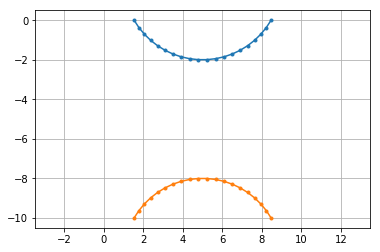

In [67]:
plt.grid(True)
plt.axis('equal')
plt.plot(split_arc1[:,0],split_arc1[:,1],'.-')
plt.plot(split_arc2[:,0],split_arc2[:,1],'.-')

In [9]:
border = np.vstack((split_bbord,split_arc1,split_fbord,split_arc2))

In [10]:
delta = 0.4

In [11]:
X,Y = np.meshgrid(np.linspace(-10+delta,10-delta,40),np.linspace(0-delta,-8+delta,15))

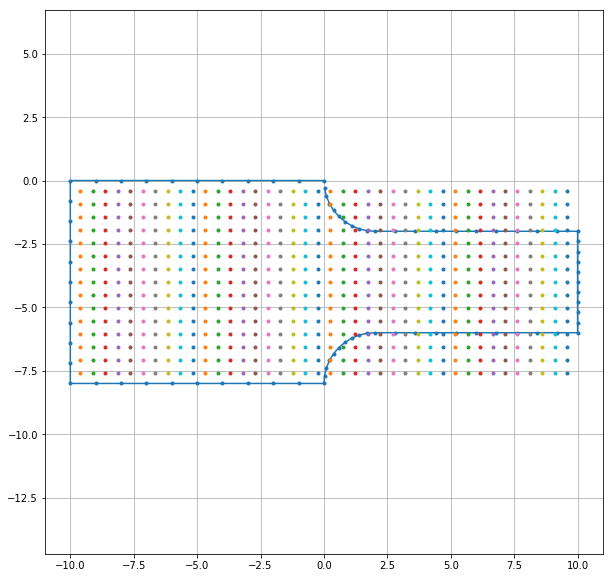

In [12]:
plt.figure(figsize=(10,10))
show_points(border)
plt.plot(X,Y,'.');

In [13]:
inner = np.vstack((X.ravel(),Y.ravel())).T
inner.shape

(600, 2)

In [14]:
delta2 = 0.25

In [15]:
mask1 = np.sum((inner-np.array([stp[0]+r1,stp[1]-h1]))**2,axis=1) > (r1+delta2)**2
mask2 = np.logical_not((inner[:,0]>r1) & (inner[:,1]>-2))
mask3 = np.sum((inner-np.array([stp[0]+r1,stp[1]-h1+r1+h2+r1]))**2,axis=1) > (r1+delta2)**2
mask4 = np.logical_not((inner[:,0]>r1) & (inner[:,1]<-6))

In [16]:
inner = inner[mask1 & mask2 & mask3 & mask4]

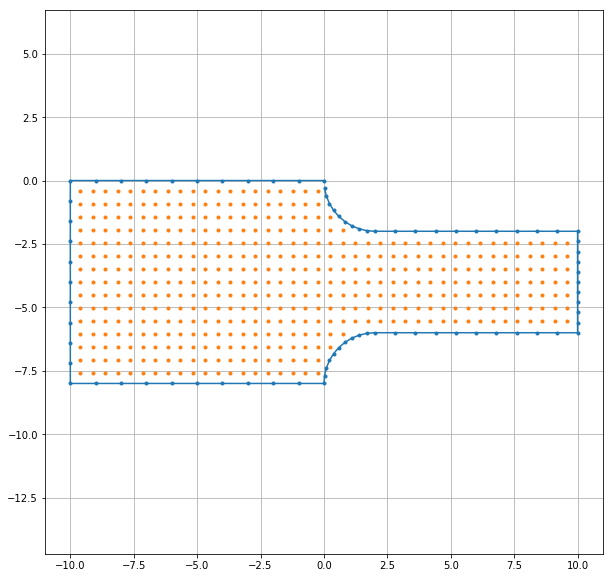

In [17]:
plt.figure(figsize=(10,10))
show_points(border)
plt.plot(inner[:,0],inner[:,1],'.')

In [18]:
Nodes = np.vstack((border,inner))

In [19]:
Nodes.shape

(526, 2)

In [20]:
trng = scipy.spatial.Delaunay(Nodes)

(-11.0, 11.0, -8.4, 0.4)

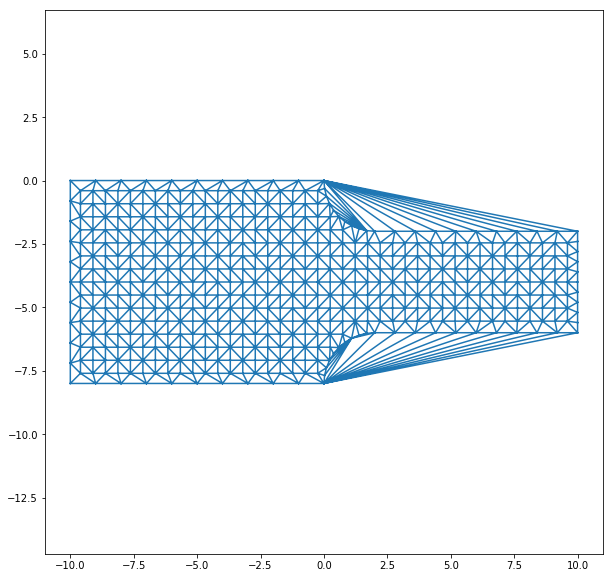

In [21]:
plt.figure(figsize=(10,10))
plt.triplot(Nodes[:,0],Nodes[:,1],trng.simplices.copy())
plt.axis('equal')

In [22]:
trng_vertices = Nodes[trng.simplices]

In [23]:
trng_x_verices = trng_vertices[:,:,0]

In [24]:
trng_y_verices = trng_vertices[:,:,1]

In [25]:
trng_x_mean = np.mean(trng_x_verices,axis=1)
trng_y_mean = np.mean(trng_y_verices,axis=1)

In [26]:
trng_centers = np.hstack((trng_x_mean.reshape(-1,1),trng_y_mean.reshape(-1,1)))

In [27]:
delta2 = 0.01
mask_tri1_1 = np.sum((trng_centers - np.array([stp[0]+r1,stp[1]-h1]))**2, axis=1) > (r1+delta2)**2
mask_tri2_1 = np.logical_not((trng_centers[:, 0] > stp[0]+r1) & (trng_centers[:, 1] > stp[1]-h1+r1+h2))

mask_tri3_1 = np.sum((trng_centers - np.array([stp[0]+r1,stp[1]-h1+r1+h2+r1]))**2, axis=1) > (r1+delta2)**2
mask_tri4_1 = np.logical_not((trng_centers[:, 0] > stp[0]+r1) & (trng_centers[:, 1] < stp[1]-h1+r1))

In [28]:
simplices = trng.simplices.copy()
simplices = simplices[mask_tri1_1 & mask_tri2_1 & mask_tri3_1 & mask_tri4_1]

(-11.0, 11.0, -8.4, 0.4)

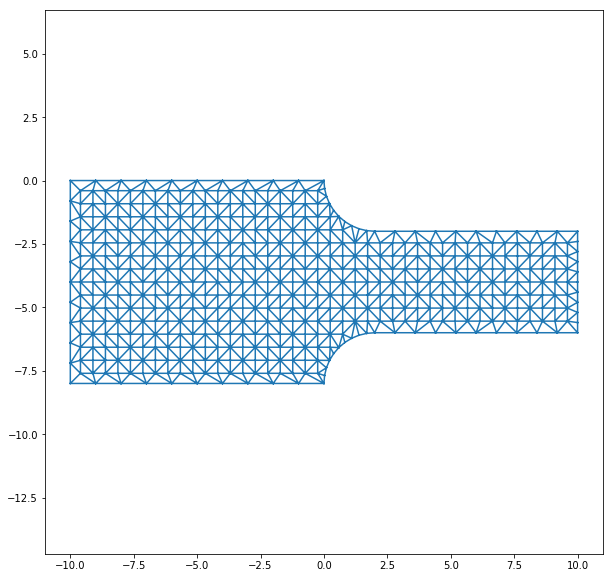

In [29]:
plt.figure(figsize=(10,10))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
plt.axis('equal')

In [30]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1] - ab[:,1]*ac[:,0])

In [31]:
trng_vertices2 = Nodes[simplices] # Пересчитаем, т.к. надо учитывать маски
A = triarea(trng_vertices2[:,0], trng_vertices2[:,1], trng_vertices2[:,2])
A.shape

(970,)

In [32]:
b = trng_vertices2[:, [1,2,0], 1] - trng_vertices2[:, [2, 0, 1], 1]
b

array([[ 0.        , -0.45714286,  0.45714286],
       [ 0.8       , -0.4       , -0.4       ],
       [ 0.45714286, -0.45714286,  0.        ],
       ...,
       [-0.51428571,  0.        ,  0.51428571],
       [ 0.        , -0.51428571,  0.51428571],
       [ 0.51428571, -0.51428571,  0.        ]])

In [33]:
c = trng_vertices2[:, [2,0,1],0] - trng_vertices2[:,[1,2,0],0]
c

array([[ 0.8       , -0.52307692, -0.27692308],
       [ 0.        ,  0.4       , -0.4       ],
       [ 0.58461538,  0.21538462, -0.8       ],
       ...,
       [ 0.        , -0.49230769,  0.49230769],
       [ 0.49230769,  0.        , -0.49230769],
       [ 0.        ,  0.49230769, -0.49230769]])

In [34]:
z = np.zeros_like(b[:,0])
z.shape

(970,)

In [35]:
#B1 = np.array([b[0], 0, b[1], 0, b[2], 0])
B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1)
B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1)
B3 = np.stack((c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]), axis=1)
print(B1.shape)
print(B2.shape)
print(B3.shape)

(970, 6)
(970, 6)
(970, 6)


In [36]:
B = np.stack((B1, B2, B3), axis=1)
B.shape

(970, 3, 6)

In [37]:
# Каждую матрицу 3х6 надо умножить на свой коэффициент
# Определим это коэффициент (две площади элемента, которому она соответствует)
coef = 1/(2*A)
coef.shape

(970,)

In [38]:
B *= coef.reshape(-1, 1, 1)
B.shape

(970, 3, 6)

In [39]:
# Модуль Юнга
E = 2e7 # Н/см^2
mu = 0.25 # коэффициент Ламэ, безразмерный
t = 0.5 # cm
P = 44e3 # Н/см^2

In [40]:
D = E / (1 - mu**2)*np.array([[1,mu,0], [mu,1,0], [0,0,0.5*(1-mu)]])

In [41]:
D

array([[21333333.33333333,  5333333.33333333,        0.        ],
       [ 5333333.33333333, 21333333.33333333,        0.        ],
       [       0.        ,        0.        ,  8000000.        ]])

In [42]:
BT = np.transpose(B, axes=(0,2,1))
BT.shape

(970, 6, 3)

In [43]:
# Матрица жесткостей для всех элементов
Ke = np.matmul(np.matmul(BT, D), B)*t*A.reshape(-1, 1, 1)
Ke.shape

(970, 6, 6)

In [44]:
coords0 = simplices[:, 0].reshape(-1, 1)
coords1 = simplices[:, 1].reshape(-1, 1)
coords2 = simplices[:, 2].reshape(-1, 1)

In [45]:
EFT = np.hstack((coords0*2, coords0*2+1, coords1*2, coords1*2+1, coords2*2, coords2*2+1))
EFT

array([[ 864,  865,   86,   87,   88,   89],
       [1012, 1013,   38,   39,   40,   41],
       [ 134,  135,  136,  137,  382,  383],
       ...,
       [ 346,  347,  428,  429,  348,  349],
       [ 346,  347,  424,  425,  426,  427],
       [ 346,  347,  344,  345,  424,  425]], dtype=int32)

In [46]:
EFT.shape

(970, 6)

In [47]:
Nn = Nodes.shape[0]
K = np.zeros((2*Nn, 2*Nn))

In [48]:
# i -- номер элемента
for i in range(simplices.shape[0]):
    K[EFT[i, np.newaxis].T,EFT[i]] += Ke[i]

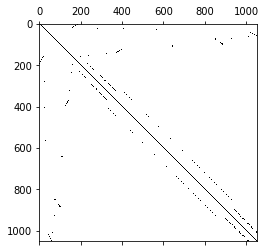

In [49]:
plt.spy(K)

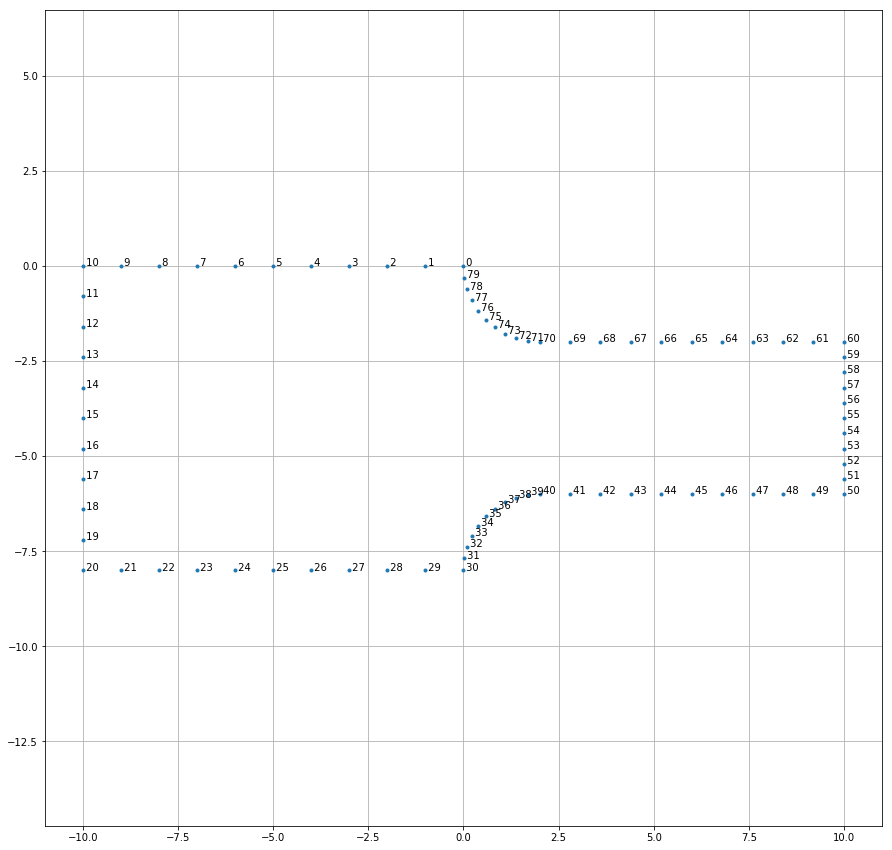

In [50]:
plt.figure(figsize=(15,15))
plt.plot(border[:,0], border[:,1], '.')
for i, p in enumerate(border):
    plt.text(p[0], p[1], ' %d'%i)
plt.axis('equal')
plt.grid(True)

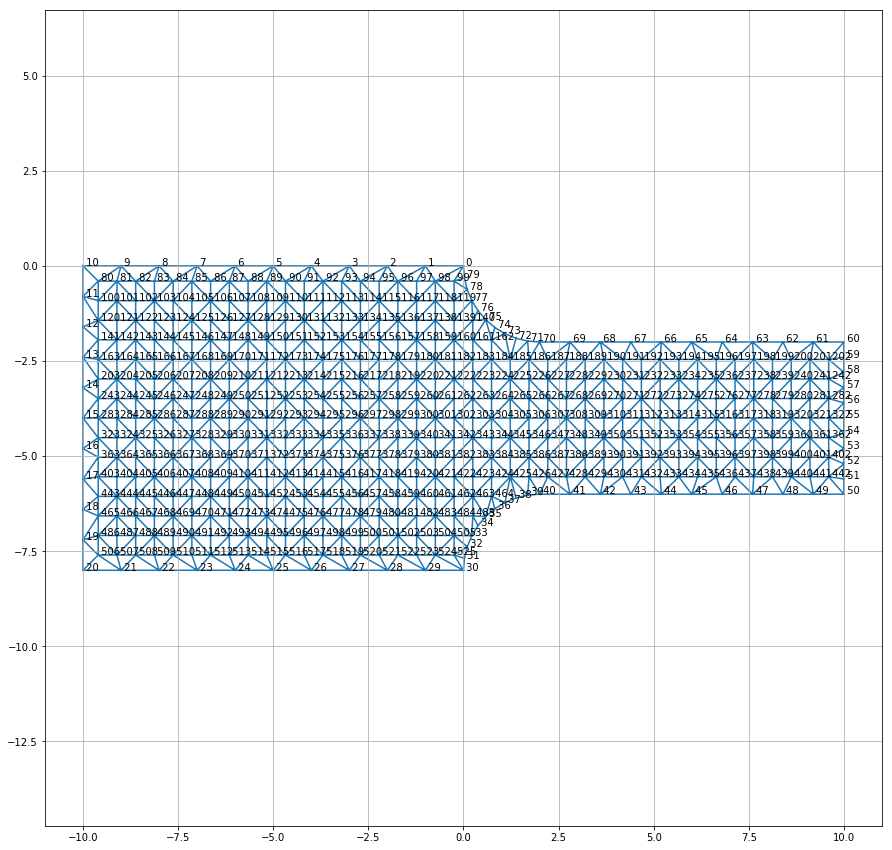

In [51]:
plt.figure(figsize=(15,15))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
for i, p in enumerate(Nodes):
    plt.text(p[0], p[1], ' %d'%i)
plt.axis('equal')
plt.grid(True)

In [52]:

fixed = np.arange(10,21)


dof = np.hstack((fixed*2, fixed*2+1))
dof

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 21, 23, 25, 27, 29, 31,
       33, 35, 37, 39, 41])

In [53]:
K[dof,:] = 0
K[:,dof] = 0
K[dof,dof] = 1 # На диагоналях записываем 1

In [54]:
F = np.zeros(2*Nn)

In [55]:
force = h2/5.0 * t * P
bb1 = np.arange(51,60)
dof_full = bb1*2
dof_half = np.array([50,60],dtype=int)*2

F[dof_full] = force
F[dof_half] = force*0.5

In [82]:
F.shape

(1052,)

In [56]:
F[dof] = 0

In [57]:
U = np.linalg.solve(K, F)

In [58]:
np.max(np.abs(U))

0.06692895053904897

In [60]:
scale = 10 # Масштабный коэффициент

In [61]:
ResNodes = Nodes + scale*U.reshape(-1, 2)

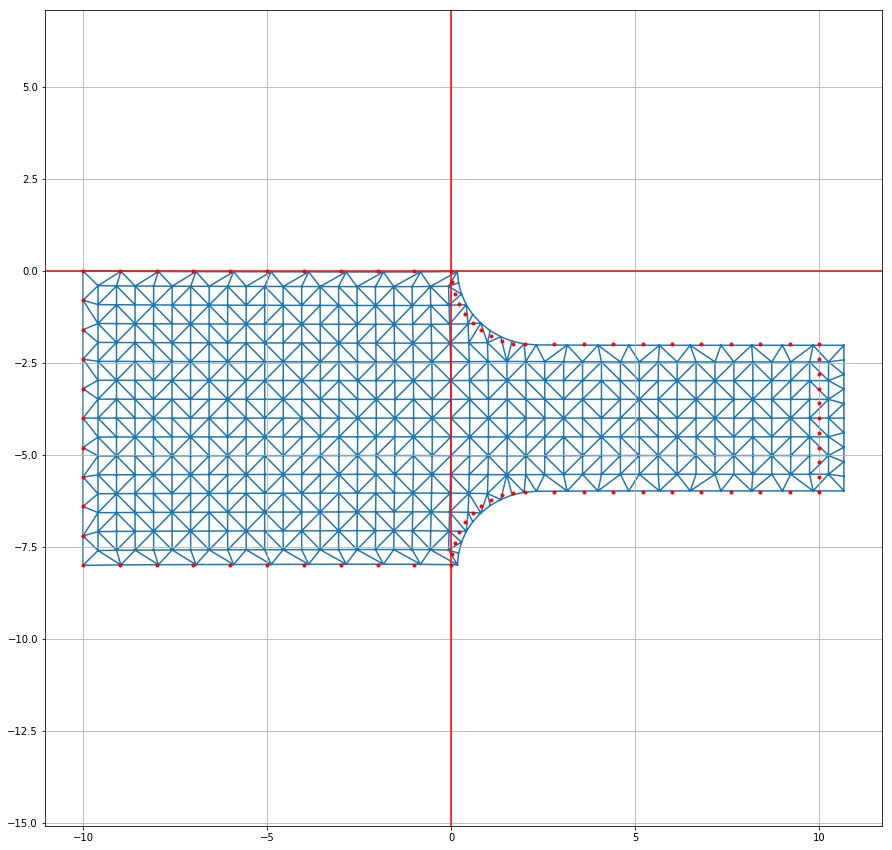

In [62]:
plt.figure(figsize=(15, 15))
plt.triplot(ResNodes[:, 0], ResNodes[:, 1], simplices)
plt.plot(border[:,0], border[:,1], '.r')

plt.axhline(0., c='r')
plt.axvline(0., c='r')

plt.axis('equal')
plt.grid(True)

In [63]:
# Перемещение для одного элемента
Ue = U[EFT, None]
Ue.shape

(970, 6, 1)

In [64]:
Eps = np.matmul(B, Ue)
Eps[0], Eps.shape

(array([[ 4.36119763e-03],
        [-1.08396089e-03],
        [-1.55013659e-05]]), (970, 3, 1))

In [65]:
Sig = np.matmul(D, Eps)

(-11.033464475269525, 11.702753980660018, -8.4, 0.4)

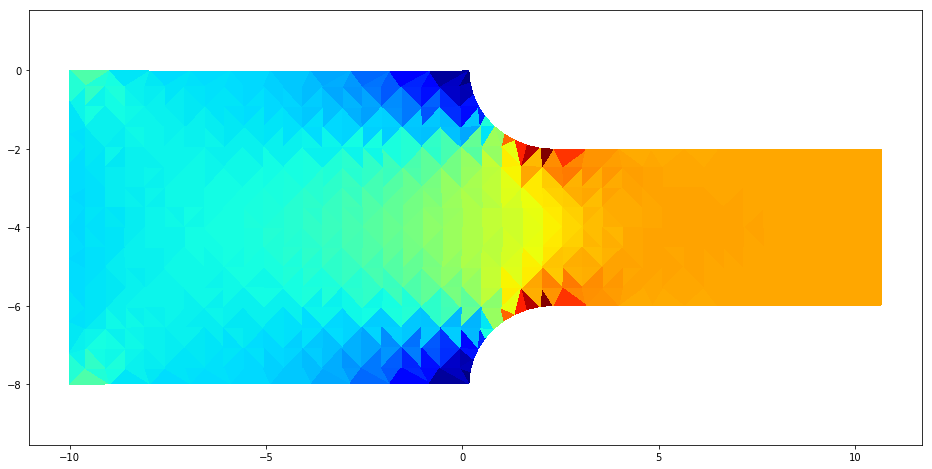

In [85]:
plt.figure(figsize=(16,8))
plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, Sig[:,0].ravel(), cmap='jet')
plt.axis('equal')

In [87]:
NodeA = np.zeros((Nn,1))
NodeSig = np.zeros((Nn,3))
for i, e in enumerate(simplices):
    NodeSig[e] += Sig[i].T*A[i]
    NodeA[e] += A[i]
NodeSig /= NodeA

(-11.033464475269525, 11.702753980660018, -8.4, 0.4)

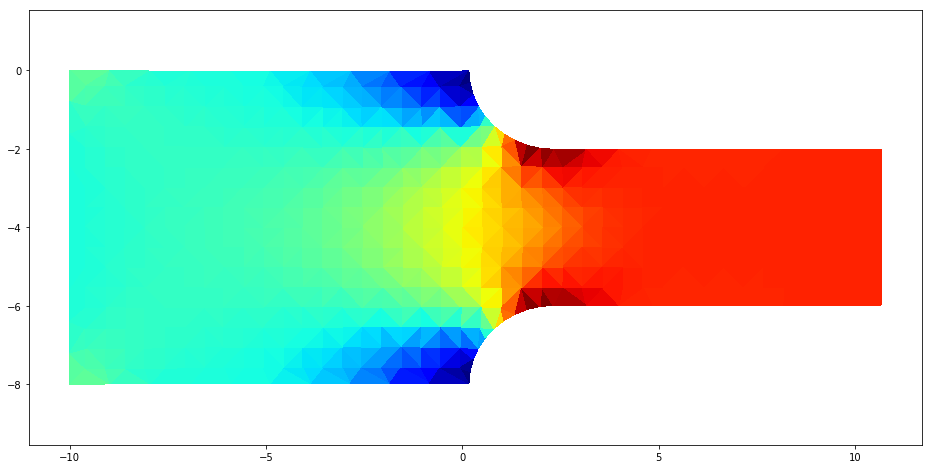

In [88]:
plt.figure(figsize=(16,8))
plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, NodeSig[:,0].ravel(), cmap='jet')
plt.axis('equal')

In [89]:
NodeS1 = 0.5*(NodeSig[:,0]+NodeSig[:,1])+\
         np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)

(-11.033464475269525, 11.702753980660018, -8.4, 0.4)

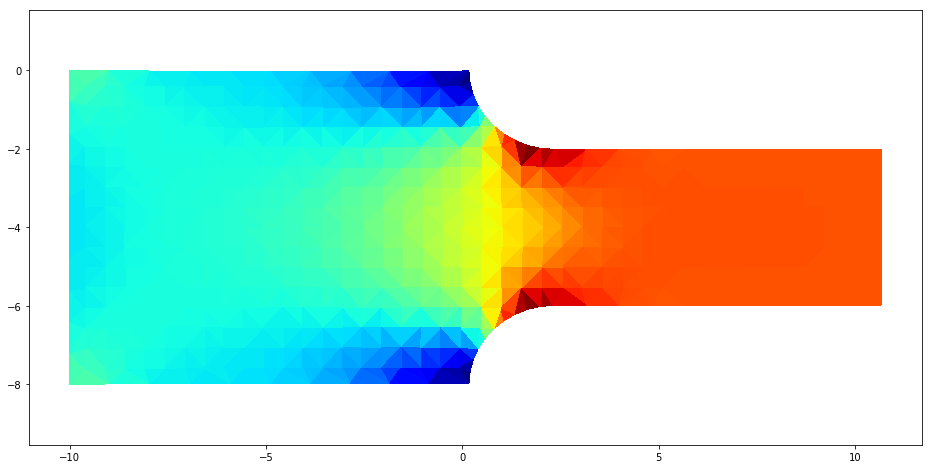

In [90]:
plt.figure(figsize=(16,8))
plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet')
plt.axis('equal')

In [91]:
i_max = np.argmax(np.abs(NodeS1))
i_max

38

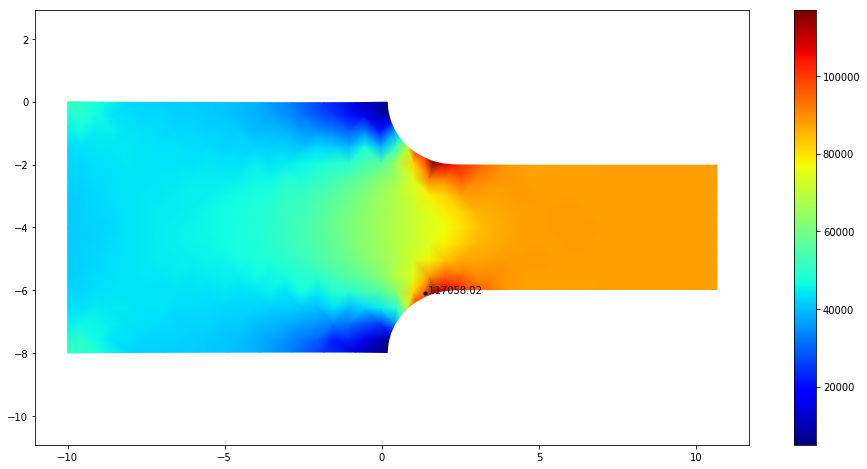

In [92]:
plt.figure(figsize=(16,8))
handle = plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet', shading='gouraud')
plt.plot(Nodes[i_max,0], Nodes[i_max,1], '.k')
plt.text(Nodes[i_max,0], Nodes[i_max,1], ' %.2f'%NodeS1[i_max])
plt.axis('equal')
plt.gcf().colorbar(handle)

(-10.0, 10.66928950539049, -8.0, 0.0)

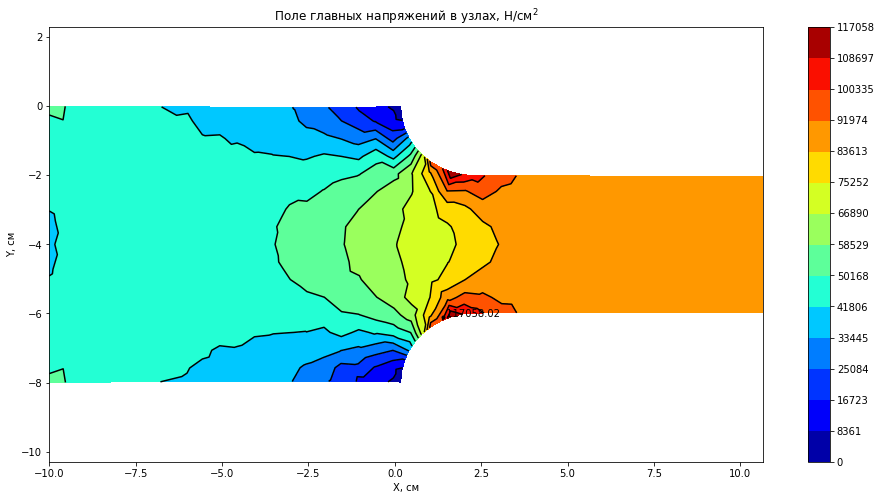

In [94]:
plt.figure(figsize=(16,8))
levels = np.linspace(0, NodeS1[i_max], 15)
handle = plt.tricontourf(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet',levels=levels)
plt.tricontour(ResNodes[:, 0], ResNodes[:, 1], simplices, 
              NodeS1.ravel(), colors='k', levels=levels)
plt.plot(Nodes[i_max,0], Nodes[i_max,1], '.k')
plt.text(Nodes[i_max,0], Nodes[i_max,1], ' %.2f'%NodeS1[i_max])
cb = plt.gcf().colorbar(handle)
cb.set_ticks(levels)
plt.title('Поле главных напряжений в узлах, Н/см$^2$')
plt.xlabel('X, см')
plt.ylabel('Y, см')
plt.axis('equal')